# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect6. Softmax Regression

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

### <font color='brown'>Softmax Classification</font>
> Multinomial classification
> - hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

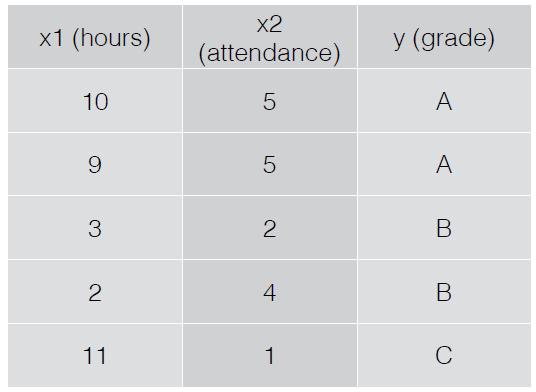

In [2]:
# Multinomial_classification_for_grade
bpc.Figure(bpc.ML06_IMG_01, 400)

In [3]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()


tf.set_random_seed(777)  # for reproducibility

x_data = [[10,5], [9,5], [3,2], [2,4], [11,1]]
y_data = [[1, 0, 0], 
          [1, 0, 0], 
          [0, 1, 0], 
          [0, 1, 0],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 2])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([2, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]),    name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))


C:\Users\student\AppData\Local\Temp\ipykernel_3744\862019612.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm_notebook(range(2001)):


  0%|          | 0/2001 [00:00<?, ?it/s]

Step : 0, 	 Cost : 1.7321803569793701
Step : 200, 	 Cost : 0.08691439777612686
Step : 400, 	 Cost : 0.049318935722112656
Step : 600, 	 Cost : 0.034343160688877106
Step : 800, 	 Cost : 0.02629532292485237
Step : 1000, 	 Cost : 0.021281050518155098
Step : 1200, 	 Cost : 0.017861973494291306
Step : 1400, 	 Cost : 0.015383698046207428
Step : 1600, 	 Cost : 0.01350598968565464
Step : 1800, 	 Cost : 0.012034887447953224
Step : 2000, 	 Cost : 0.01085150521248579


In [5]:
# Testing & One-hot encoding
test_data = [[9.5, 5.5], 
             [9.9, 1.5], 
             [3.1, 2.1]]

pred_val = sess.run(hypothesis, feed_dict={X: test_data})
pred_idx = sess.run(tf.argmax(pred_val, 1))

# print("predict value : \n {} \n\npredict index : {}".format(pred_val, pred_idx))
print("test data : {} \n\npredict value : \n {} \n\npredict index : {}".format(test_data, pred_val, pred_idx))


test data : [[9.5, 5.5], [9.9, 1.5], [3.1, 2.1]] 

predict value : 
 [[9.9070227e-01 9.2813568e-03 1.6371087e-05]
 [2.4168992e-02 1.4852300e-07 9.7583085e-01]
 [3.3093404e-02 9.6228808e-01 4.6184692e-03]] 

predict index : [0 2 1]


In [6]:
# grade로 예측값 표기
grade = ['A', 'B', 'C']
arg_val = sess.run(tf.arg_max(pred_val, 1))
p_grade = [ grade[val] for val in arg_val ]
print(p_grade)


['A', 'C', 'B']


### 좀더 복잡한 Classification

In [7]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1], 
          [2, 1, 3, 2], 
          [3, 1, 3, 4], 
          [4, 1, 5, 5],
          [1, 7, 5, 5], 
          [1, 2, 5, 6], 
          [1, 6, 6, 6], 
          [1, 7, 7, 7]]

y_data = [[0, 0, 1], 
          [0, 0, 1], 
          [0, 0, 1], 
          [0, 1, 0],
          [0, 1, 0], 
          [0, 1, 0], 
          [1, 0, 0], 
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [8]:
# ?tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [9]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))


C:\Users\student\AppData\Local\Temp\ipykernel_3744\862019612.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm_notebook(range(2001)):


  0%|          | 0/2001 [00:00<?, ?it/s]

Step : 0, 	 Cost : 4.487739562988281
Step : 200, 	 Cost : 0.6349910497665405
Step : 400, 	 Cost : 0.5222903490066528
Step : 600, 	 Cost : 0.42837533354759216
Step : 800, 	 Cost : 0.33695128560066223
Step : 1000, 	 Cost : 0.25046083331108093
Step : 1200, 	 Cost : 0.21889786422252655
Step : 1400, 	 Cost : 0.19937297701835632
Step : 1600, 	 Cost : 0.18293988704681396
Step : 1800, 	 Cost : 0.1689259558916092
Step : 2000, 	 Cost : 0.15684184432029724


In [10]:
# Testing & One-hot encoding
a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
print(a, '\n예측값 :', sess.run(tf.arg_max(a, 1)))

[[2.0617729e-03 9.9792719e-01 1.1085488e-05]] 
예측값 : [1]


In [11]:
b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
print(b, '\n예측값 :', sess.run(tf.arg_max(b, 1)))

[[0.91595197 0.07395753 0.01009047]] 
예측값 : [0]


In [12]:
c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
print(c, '\n예측값 :', sess.run(tf.arg_max(c, 1)))

[[2.0442236e-08 3.7468417e-04 9.9962533e-01]] 
예측값 : [2]


In [13]:
all = sess.run(hypothesis, feed_dict={
               X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
print(all, '\n\n예측값 :', sess.run(tf.arg_max(all, 1)))

[[2.06177100e-03 9.97927189e-01 1.10854990e-05]
 [9.15951967e-01 7.39575326e-02 1.00904675e-02]
 [2.04422381e-08 3.74684372e-04 9.99625325e-01]] 

예측값 : [1 0 2]


### <font color='brown'>Animal classification with softmax_cross_entropy_with_logits</font>
> 
> - Ref  : https://kr.pinterest.com/explore/animal-classification-activity/?lp=true
> - Data : https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

<!--
![Graph](./images/lab06_zoo_animal_type.png)
![Graph](./images/lab06_zoo_data.png)
//-->

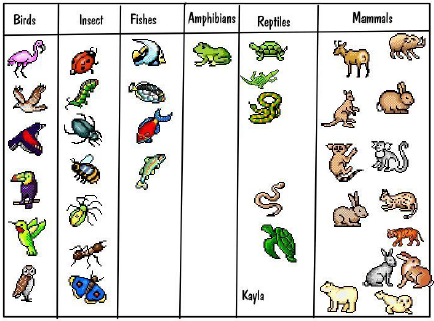

In [14]:
bpc.Figure(bpc.ML06_IMG_02)

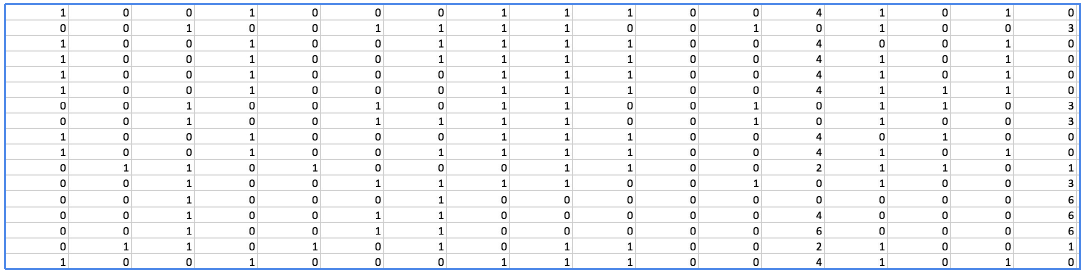

In [15]:
bpc.Figure(bpc.ML06_IMG_03)

In [16]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('./data/data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)
print('\nx_data :\n', x_data)
print('\ny_data :\n', y_data)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("\none_hot", Y_one_hot)

Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("\nreshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


(101, 16) (101, 1)

x_data :
 [[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]

y_data :
 [[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [5.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [5.]
 [5.]
 [1.]
 [5.]
 [1.]
 [0.]
 [0.]
 [6.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [4.]
 [6.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [6.]
 [3.]
 [0.]
 [0.]
 [2.]
 [6.]
 [1.]
 [1.]
 [2.]
 [6.]
 [3.]
 [1.]
 [0.]
 [6.]
 [3.]
 [1.]
 [5.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [5.]
 [0.]
 [6.]
 [1.]]

one_hot Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)

reshape Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gr

In [17]:
# ?tf.nn.softmax_cross_entropy_with_logits

In [18]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))


Step:     0, 	 Loss: 5.415, 	 Acc: 0.00%
Step:   100, 	 Loss: 0.732, 	 Acc: 84.16%
Step:   200, 	 Loss: 0.439, 	 Acc: 89.11%
Step:   300, 	 Loss: 0.325, 	 Acc: 92.08%
Step:   400, 	 Loss: 0.257, 	 Acc: 93.07%
Step:   500, 	 Loss: 0.211, 	 Acc: 94.06%
Step:   600, 	 Loss: 0.179, 	 Acc: 94.06%
Step:   700, 	 Loss: 0.154, 	 Acc: 97.03%
Step:   800, 	 Loss: 0.135, 	 Acc: 97.03%
Step:   900, 	 Loss: 0.120, 	 Acc: 99.01%
Step:  1000, 	 Loss: 0.108, 	 Acc: 99.01%
Step:  1100, 	 Loss: 0.098, 	 Acc: 99.01%
Step:  1200, 	 Loss: 0.090, 	 Acc: 100.00%
Step:  1300, 	 Loss: 0.083, 	 Acc: 100.00%
Step:  1400, 	 Loss: 0.077, 	 Acc: 100.00%
Step:  1500, 	 Loss: 0.071, 	 Acc: 100.00%
Step:  1600, 	 Loss: 0.067, 	 Acc: 100.00%
Step:  1700, 	 Loss: 0.063, 	 Acc: 100.00%
Step:  1800, 	 Loss: 0.059, 	 Acc: 100.00%
Step:  1900, 	 Loss: 0.056, 	 Acc: 100.00%


In [19]:
# Let's see if we can predict
pred = sess.run(prediction, feed_dict={X: x_data})

# y_data: (N,1) = flatten => (N, ) matches pred.shape
for p, y in zip(pred, y_data.flatten()):
    print("[{}]  Prediction : {},  True Y : {}".format(p == int(y), p, int(y)))
    # print("[{}]  Prediction : {},  True Y : {}, y_data : {}".format(p == int(y), p, int(y), y_data))

[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 5,  True Y : 5
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 0,  Tru

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>